In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
import geopandas as gpd
import folium as fl


In [ ]:
#estimaciones de poblacion ROSARIO. FUENTE EN DOCUMENTACION
data_pobl = pd.read_csv('barrios/Proyecciones por distrito poblacion.csv')
data_pobl.head()

,Ámbito,Sector,Sexo,Total,0-4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95 o más
0,Distrito,Centro,Varón,116952.987648,6315.497834,5222.403932,5247.769682,7209.535750,12177.949661,13070.218479,...,6528.894070,6192.544226,5674.296027,4705.459444,3872.918328,3152.785676,2307.852384,1202.361515,321.744340,88.507609
1,Distrito,Centro,Mujer,143131.537051,6160.131777,5043.770436,5177.547504,7905.778479,13915.581970,13902.334082,...,8221.086731,8271.025043,7939.349399,6784.404066,6150.938395,5803.771633,5273.916468,3455.258652,1367.238814,438.423881
2,Distrito,Centro,Total,260084.524699,12475.629611,10266.174368,10425.317186,15115.314230,26093.531631,26972.552561,...,14749.980801,14463.569269,13613.645426,11489.863510,10023.856723,8956.557310,7581.768852,4657.620167,1688.983155,526.931490
3,Distrito,Norte,Varón,70091.628167,5179.294660,4886.046558,5252.873275,5714.605741,5980.128568,5850.033046,...,3875.140374,3639.475535,3147.885081,2676.555404,2103.921837,1651.786582,1101.546507,504.386735,148.223586,30.924345
4,Distrito,Norte,Mujer,76696.641782,4865.785780,4775.145458,5099.317905,5591.974716,5842.568549,5735.932876,...,4237.701663,4287.820430,3944.453561,3468.858458,2981.533430,2569.919730,2267.074418,1361.737550,431.874478,116.232884


In [10]:
data_pobl.columns = [name.lower() for name in data_pobl.columns]
data_pobl.head()

,ámbito,sector,sexo,total,0-4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95 o más
0,Distrito,Centro,Varón,116952.987648,6315.497834,5222.403932,5247.769682,7209.535750,12177.949661,13070.218479,...,6528.894070,6192.544226,5674.296027,4705.459444,3872.918328,3152.785676,2307.852384,1202.361515,321.744340,88.507609
1,Distrito,Centro,Mujer,143131.537051,6160.131777,5043.770436,5177.547504,7905.778479,13915.581970,13902.334082,...,8221.086731,8271.025043,7939.349399,6784.404066,6150.938395,5803.771633,5273.916468,3455.258652,1367.238814,438.423881
2,Distrito,Centro,Total,260084.524699,12475.629611,10266.174368,10425.317186,15115.314230,26093.531631,26972.552561,...,14749.980801,14463.569269,13613.645426,11489.863510,10023.856723,8956.557310,7581.768852,4657.620167,1688.983155,526.931490
3,Distrito,Norte,Varón,70091.628167,5179.294660,4886.046558,5252.873275,5714.605741,5980.128568,5850.033046,...,3875.140374,3639.475535,3147.885081,2676.555404,2103.921837,1651.786582,1101.546507,504.386735,148.223586,30.924345
4,Distrito,Norte,Mujer,76696.641782,4865.785780,4775.145458,5099.317905,5591.974716,5842.568549,5735.932876,...,4237.701663,4287.820430,3944.453561,3468.858458,2981.533430,2569.919730,2267.074418,1361.737550,431.874478,116.232884


In [16]:
data_pobl.rename(columns={'ámbito' : 'ambito'}, inplace=True)
data_pobl.columns

Index(['ambito', 'sector', 'sexo', 'total', '0-4', '5-9', '10-14', '15-19',
       '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94',
       '95 o más'],
      dtype='object')

In [18]:
data_pobl['sector'].unique()
data_pobl['sector'].value_counts()

sector
Centro      3
Norte       3
Noroeste    3
Oeste       3
Sudoeste    3
Sur         3
Rosario     3
Name: count, dtype: int64

In [ ]:
data_pobl.dtypes

In [ ]:
# Convertir solo columnas numéricas a enteros
data_pobl[data_pobl.select_dtypes(include=['float']).columns] = data_pobl.select_dtypes(include=['float']).round(0).astype(int)

# Verificar el resultado
print(data_pobl.dtypes)


In [56]:
data_pobl.head()

,ambito,sector,sexo,total,0-4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95 o más
0,Distrito,Centro,Varón,116953,6315,5222,5248,7210,12178,13070,...,6529,6193,5674,4705,3873,3153,2308,1202,322,89
1,Distrito,Centro,Mujer,143132,6160,5044,5178,7906,13916,13902,...,8221,8271,7939,6784,6151,5804,5274,3455,1367,438
2,Distrito,Centro,Total,260085,12476,10266,10425,15115,26094,26973,...,14750,14464,13614,11490,10024,8957,7582,4658,1689,527
3,Distrito,Norte,Varón,70092,5179,4886,5253,5715,5980,5850,...,3875,3639,3148,2677,2104,1652,1102,504,148,31
4,Distrito,Norte,Mujer,76697,4866,4775,5099,5592,5843,5736,...,4238,4288,3944,3469,2982,2570,2267,1362,432,116


################    ABAJO ESTADISTICAS DE CRIMEN. PAIS, PROVINCIAS Y DEPARTAMENTOS-->ROSARIO. PERO ESTAN TODOS LOS DEPARTAMENTOS, SE PUEDEN HACER COMPARACIONES.

In [ ]:
#df crimen agregado por provincias.
data_crimen = pd.read_csv('crimen/snic-provincias.csv')
data_crimen.head()

,provincia_id,provincia_nombre,anio,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas,cantidad_victimas_masc,cantidad_victimas_fem,cantidad_victimas_sd,tasa_hechos,tasa_victimas,tasa_victimas_masc,tasa_victimas_fem
0,2,Ciudad Autónoma de Buenos Aires,2000,1,Homicidios dolosos,149,158.0,121.0,37.0,0.0,4.975001,5.275505,8.825701,2.278360
1,2,Ciudad Autónoma de Buenos Aires,2000,2,Homicidios dolosos en grado de tentativa,54,58.0,40.0,18.0,0.0,1.803021,1.936578,2.917587,1.108391
2,2,Ciudad Autónoma de Buenos Aires,2000,3,Muertes en accidentes viales,121,126.0,97.0,29.0,0.0,4.040102,4.207048,7.075148,1.785742
3,2,Ciudad Autónoma de Buenos Aires,2000,4,Homicidios culposos por otros hechos,35,36.0,20.0,13.0,3.0,1.168624,1.202014,1.458793,0.800505
4,2,Ciudad Autónoma de Buenos Aires,2000,5,Lesiones dolosas,13154,13732.0,8105.0,5485.0,142.0,439.202480,458.501460,591.176030,337.751500


In [27]:
data_crimen['provincia_nombre'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Catamarca',
       'Córdoba', 'Corrientes', 'Chaco', 'Chubut', 'Entre Ríos',
       'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
       'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [ ]:
#df crimen desagregado por departamento
data_crimen_dep = pd.read_csv('crimen/snic-departamentos-anual.csv', sep=';')
data_crimen_dep.head()

,provincia_id,provincia_nombre,departamento_id,departamento_nombre,anio,codigo_delito_snic_id,cod_delito,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas,cantidad_victimas_masc,cantidad_victimas_fem,cantidad_victimas_sd,tasa_hechos,tasa_victimas,tasa_victimas_masc,tasa_victimas_fem
0,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,2000,1,1,Homicidios dolosos,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,2000,10,10,Abusos sexuales con acceso carnal (violaciones),0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,2000,11,11,Otros delitos contra la integridad sexual,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,2000,12,12,Delitos contra el estado civil,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,2000,13,13,Amenazas,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [34]:
data_crimen_dep['provincia_nombre'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Catamarca',
       'Córdoba', 'Corrientes', 'Chaco', 'Chubut', 'Entre Ríos',
       'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
       'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [ ]:
#DATA CRIMEN SANTA FE
dep_santafe = data_crimen_dep[data_crimen_dep['provincia_nombre'] == 'Santa Fe']

In [36]:
dep_santafe['departamento_nombre'].unique()

array(['Belgrano', 'Caseros', 'Castellanos', 'Constitución', 'Garay',
       'General López', 'General Obligado', 'Iriondo', 'La Capital',
       'Las Colonias', '9 de Julio', 'Rosario', 'San Cristóbal',
       'San Javier', 'San Jerónimo', 'San Justo', 'San Lorenzo',
       'San Martín', 'Vera', 'Departamento sin determinar'], dtype=object)

In [ ]:
#DATA CRIMEN ROSARIO
data_rosario = dep_santafe[dep_santafe['departamento_nombre'] == 'Rosario']
data_rosario.head()

,provincia_id,provincia_nombre,departamento_id,departamento_nombre,anio,codigo_delito_snic_id,cod_delito,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas,cantidad_victimas_masc,cantidad_victimas_fem,cantidad_victimas_sd,tasa_hechos,tasa_victimas,tasa_victimas_masc,tasa_victimas_fem
442873,82,Santa Fe,82084,Rosario,2000,1,1,Homicidios dolosos,73,85.0,76.0,8.0,1.0,6.233009,7.257613,NaN,NaN
442874,82,Santa Fe,82084,Rosario,2000,10,10,Abusos sexuales con acceso carnal (violaciones),67,67.0,7.0,59.0,1.0,5.720707,5.720707,NaN,NaN
442875,82,Santa Fe,82084,Rosario,2000,11,11,Otros delitos contra la integridad sexual,137,139.0,34.0,105.0,0.0,11.697564,11.868332,NaN,NaN
442876,82,Santa Fe,82084,Rosario,2000,12,12,Delitos contra el estado civil,0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
442877,82,Santa Fe,82084,Rosario,2000,13,13,Amenazas,4122,NaN,NaN,NaN,NaN,351.951540,NaN,NaN,NaN


In [39]:
data_rosario['anio'].dtype

dtype('int64')

In [ ]:
#crimenes posteriores a 2016, inclusive
data_rosario16 = data_rosario[data_rosario['anio'] >= 2016]

In [ ]:
data_rosario16['codigo_delito_snic_nombre'] == 'Homicidios dolosos'

codigo_delito_snic_nombre
Homicidios dolosos                                            8
Delitos contra la seguridad de la nación                      8
Abusos sexuales con acceso carnal (violaciones)               8
Delitos contra el honor                                       8
Otros delitos contra las personas                             8
                                                             ..
Abuso sexual simple                                           1
Tentativa de abuso sexual con acceso carnal                   1
Robos agravados por el resultado de lesiones y/o muertes      1
Ley 23.737 (estupefacientes)                                  1
Acceso ilegal a sistemas informáticos y daños informáticos    1
Name: count, Length: 69, dtype: int64

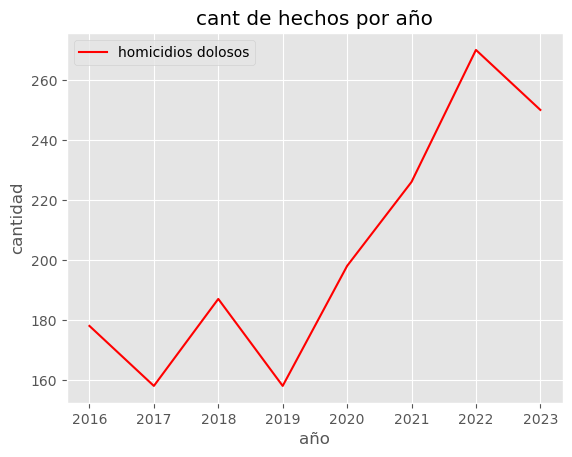

In [49]:
plt.plot(
    data_rosario16[data_rosario16['cod_delito'] == 1]['anio'],
    data_rosario16[data_rosario16['cod_delito'] == 1]['cantidad_hechos'],
    color='red',
    label='homicidios dolosos'
)


plt.title('cant de hechos por año')
plt.xlabel('año')
plt.ylabel('cantidad')
plt.legend()
plt.grid(True)
plt.show()

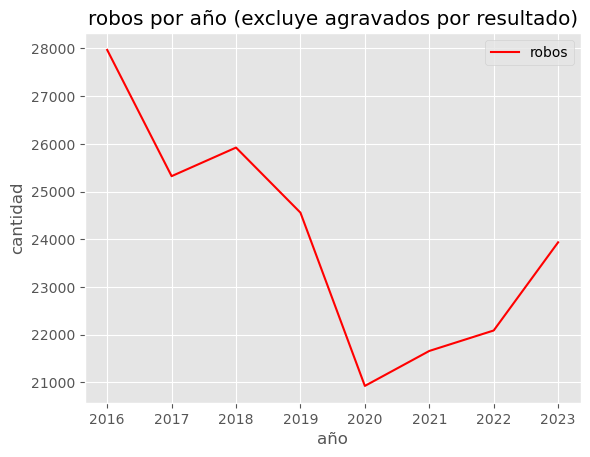

In [50]:
plt.plot(
    data_rosario16[data_rosario16['cod_delito'] == 15]['anio'],
    data_rosario16[data_rosario16['cod_delito'] == 15]['cantidad_hechos'],
    color='red',
    label='robos'
)

plt.title('robos por año (excluye agravados por resultado)')
plt.xlabel('año')
plt.ylabel('cantidad')
plt.legend()
plt.grid(True)
plt.show()

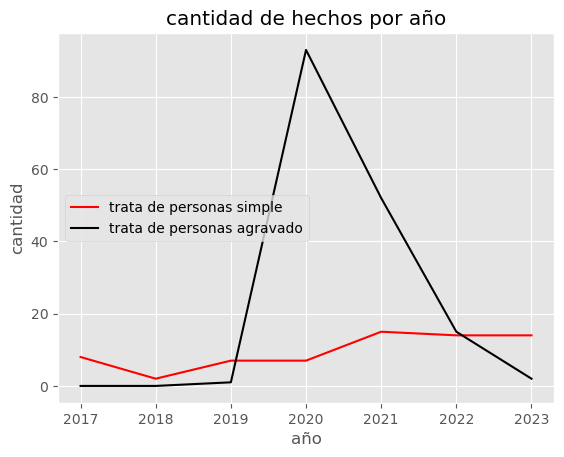

In [52]:
plt.plot(
    data_rosario16[data_rosario16['cod_delito'] == 141]['anio'],
    data_rosario16[data_rosario16['cod_delito'] == 141]['cantidad_hechos'],
    color='red',
    label='trata de personas simple'
)

plt.plot(
    data_rosario16[data_rosario16['cod_delito'] == 142]['anio'],
    data_rosario16[data_rosario16['cod_delito'] == 142]['cantidad_hechos'],
    color='black',
    label='trata de personas agravado'
)

plt.title('cantidad de hechos por año')
plt.xlabel('año')
plt.ylabel('cantidad')
plt.legend()
plt.grid(True)
plt.show()

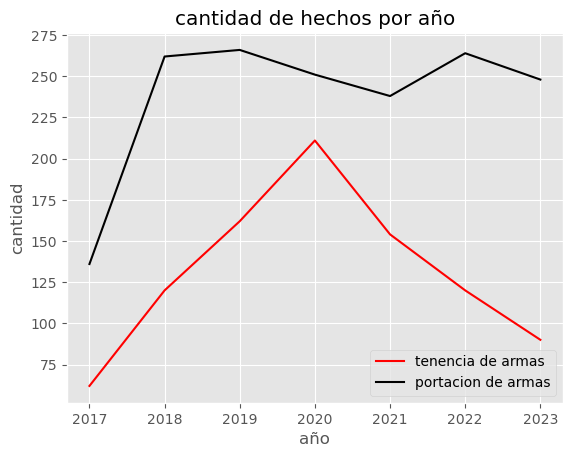

In [53]:
plt.plot(
    data_rosario16[data_rosario16['cod_delito'] == 222]['anio'],
    data_rosario16[data_rosario16['cod_delito'] == 222]['cantidad_hechos'],
    color='red',
    label='tenencia de armas'
)

plt.plot(
    data_rosario16[data_rosario16['cod_delito'] == 223]['anio'],
    data_rosario16[data_rosario16['cod_delito'] == 223]['cantidad_hechos'],
    color='black',
    label='portacion de armas'
)

plt.title('cantidad de hechos por año')
plt.xlabel('año')
plt.ylabel('cantidad')
plt.legend()
plt.grid(True)
plt.show()

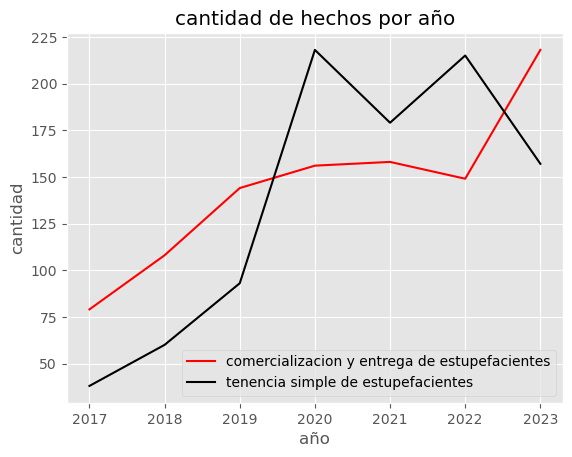

In [54]:
plt.plot(
    data_rosario16[data_rosario16['cod_delito'] == 282]['anio'],
    data_rosario16[data_rosario16['cod_delito'] == 282]['cantidad_hechos'],
    color='red',
    label='comercializacion y entrega de estupefacientes'
)

plt.plot(
    data_rosario16[data_rosario16['cod_delito'] == 286]['anio'],
    data_rosario16[data_rosario16['cod_delito'] == 286]['cantidad_hechos'],
    color='black',
    label='tenencia simple de estupefacientes'
)

plt.title('cantidad de hechos por año')
plt.xlabel('año')
plt.ylabel('cantidad')
plt.legend()
plt.grid(True)
plt.show()